In [ ]:
#Import packages
import pandas as pd
pd.set_option('mode.chained_assignment', None)  # Suppress SettingWithCopyWarning
import numpy as np

from functions import plot_cpt_data_NW_site_all, plot_cpt_data_NW_tests
import matplotlib.pyplot as plt

In [ ]:
######################## Define the text size of each plot globally ###########
SMALL_SIZE = 10
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["font.family"] = "Times New Roman"
######################## Define the text size of each plot globally ###########

In [6]:
file_path = r"..\\data\sites_invest\clay\ONSC08.xlsx"

#select desired columns as for the model training
# selected_columns_x = ['Depth (m)','qc (MPa)', 'fs (kPa)','Rf (%)','Vs (m/s)'] #for Machine learning features
# plot_columns_x_label = ['Depth (m)','$q_c$ (MPa)', '$f_s$ (kPa)','$R_f$ (%)', '$v_s$ (m/s)'] #for plotting purpose


prefix = r'..\graphics\\'
suffix = r'_test_site_silt.png'
investigated_column =  ['gamma (kN/m3)', 'su (kPa)', 'M (MN/m2)', 'OCR (-)']
investigated_column_plot =  ['$\gamma$ (kN/m$^3$)', '$s_u$ (kPa)', 'M (MN/m$^2$)', 'OCR (-)']
save_paths = [prefix + '1_gamma_prediction'+suffix, prefix + '2_su_prediction'+suffix, prefix + '3_M_prediction'+suffix, prefix + '4_OCR_prediction'+suffix]

j = 0
investigated_column_plot = investigated_column_plot[j]
investigated_column = investigated_column[j]
save_path = save_paths[j]


columns_x = ['Depth (m)','qc (MPa)', 'fs (kPa)','Rf (%)'] #for Machine learning features
plot_columns_x_label = ['Depth (m)','$q_c$ (MPa)', '$f_s$ (kPa)','$R_f$ (%)'] #for plotting purpose

columns_x.append(investigated_column)
plot_columns_x_label.append(investigated_column_plot)

# Read the Excel file into a DataFrame
df_test_norway = pd.read_excel(file_path)
df_vs = pd.DataFrame({
    'Depth (m)': df_test_norway['Depth'],
    'vs (m/s)': df_test_norway['Shear wave']
})
df_vs.drop(index=df_vs.index[:2], axis=0, inplace=True)

df_test_norway.drop(index=df_test_norway.index[:2], axis=0, inplace=True)
df_test_norway = df_test_norway.iloc[:, 0:3]  

df_test_norway.columns = ['Depth (m)', 'qc (MPa)', 'fs (kPa)']
df_test_norway.loc[:,'fs (kPa)'] = df_test_norway.loc[:,'fs (kPa)']*1000
df_test_norway.loc[:,'Rf (%)'] = df_test_norway.loc[:,'fs (kPa)']/(df_test_norway.loc[:,'qc (MPa)']*1000)*100

df_test_norway = df_test_norway.astype(float)

In [7]:
df_test_norway

,Depth (m),qc (MPa),fs (kPa),Rf (%)
2,0.01,0.18,0.00,0.000000
3,0.02,0.34,0.03,0.008824
4,0.03,0.34,0.03,0.008824
5,0.04,0.72,0.49,0.068056
6,0.05,0.93,1.63,0.175269
...,...,...,...,...
2064,20.63,0.76,11.86,1.560526
2065,20.64,0.75,11.63,1.550667
2066,20.65,0.73,11.33,1.552055
2067,20.66,0.72,11.17,1.551389


In [8]:
file_path = r"..\\data\sites_invest\silt\data_st_Kanzian.xlsx"
CPT_data = pd.read_excel(file_path)
CPT_data['Rf (%)'] = abs(CPT_data['fs (Mpa)'] / CPT_data['qc (Mpa)']*100)
CPT_data

,depth (m),qc (Mpa),fs (Mpa),iy,ix,u2 (Mpa),sec,Qt_M,i_res,Rf (%)
0,0.00,-0.0019,0.01,0.6780,0.5023,-0.0007,10.00,0.2907,0.8438,526.315789
1,0.01,-0.0019,0.01,-0.5424,-1.1382,-0.0007,11.00,8.4246,1.2608,526.315789
2,0.02,-0.0039,0.01,-0.0904,-0.1858,-0.0007,11.45,8.4406,0.2066,256.410256
3,0.03,-0.0049,0.01,0.6780,1.0046,-0.0008,11.89,8.5762,1.2120,204.081633
4,0.04,-0.0055,0.01,0.1130,1.4384,-0.0008,12.32,8.4725,1.4428,181.818182
...,...,...,...,...,...,...,...,...,...,...
2817,28.17,17.1860,0.00,15.2540,-6.0395,-0.0122,1342.40,71.5770,16.4060,0.000000
2818,28.18,16.5390,0.00,15.2770,-5.9698,-0.0140,1342.90,70.8920,16.4020,0.000000
2819,28.19,15.8430,0.00,15.3220,-6.0163,-0.0145,1343.30,70.1110,16.4610,0.000000
2820,28.20,15.2250,0.00,15.3450,-5.9466,-0.0153,1343.80,69.5540,16.4570,0.000000


In [9]:
vs_data = pd.read_excel(file_path, sheet_name='vs')
unit_weight_data = pd.read_excel(file_path, sheet_name='Soil parameter')
sdmt_data = pd.read_excel(file_path, sheet_name='SDMT', header=2)
sdmt_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0.200000,78,334,0,80.949997,250,0,16.677002,3.400000,0.000000,2.088326,23.808823,5.866035,NaN,NaN,NaN,19.483019,NaN,44.120171,SILTY SAND
1,0.400000,223,809,0,209.449982,725,0,17.658001,6.735401,0.000000,2.461447,31.096886,17.889587,NaN,NaN,NaN,63.940323,NaN,45.114597,SILTY SAND
2,0.600000,319,1027,0,299.349976,943,0,18.639000,10.267001,0.000000,2.150159,29.156515,22.334656,NaN,NaN,NaN,78.465317,NaN,44.879852,SILTY SAND
3,0.800000,140,801,0,122.699982,717,0,17.658001,13.994801,0.000000,4.843522,8.767541,20.622213,NaN,NaN,NaN,49.200054,NaN,39.899204,SAND
4,1.000000,54,562,0,44.349998,478,0,16.677002,17.526400,0.000000,9.777904,2.530468,15.047655,NaN,NaN,NaN,19.658438,NaN,33.545399,SAND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,20.400000,823,984,0,830.699951,900,0,16.677002,199.619659,141.264008,0.100517,3.453748,2.404712,NaN,0.879029,2.350781,3.391562,86.937729,NaN,CLAY
106,20.580000,829,1006,0,835.899963,922,0,17.658001,200.855728,143.029800,0.124266,3.449591,2.987671,NaN,0.878192,2.34637,4.210071,87.344490,NaN,CLAY
107,20.760000,823,1017,0,829.049927,933,0,17.658001,202.268356,144.795609,0.151917,3.382904,3.607068,NaN,0.864691,2.275992,5.010720,85.838417,NaN,CLAY
108,20.930000,816,1004,0,822.349976,920,0,17.658001,203.602524,146.463303,0.144477,3.319638,3.388456,NaN,0.851753,2.20994,4.641472,84.389481,NaN,CLAY


In [10]:
# vs2 = lambda fs: 118.8 * np.log(fs) + 18.5         #mayne 2006
# vs3 = lambda qc: 11.711 * (qc*1000) **0.3409       #Hegazy and Mayne 2006

# vs10 = lambda qc, fs: 12.02*(qc*1000)**0.319*(fs)**(-0.0466) #Hegazy and Mayne 1995
# vs12 = lambda qc, fs, z: 18.4*(qc*1000)**0.144*(fs)**0.083*(z)**0.278 #McGann et al. 2018

# vs_2 = abs(vs2(fs))
# vs_3 = vs3(qc)
# vs_10 = vs10(qc, fs)
# vs_12 = vs12(qc, fs, z)

In [11]:
import joblib
import glob
import os

pred_dict = {}

# df_cpt_data = df_test_norway.copy()
# df_cpt_data = df_cpt_data[['depth (m)', 'qc (Mpa)', 'fs (Mpa)', 'Rf (%)']]
# df_cpt_data.columns = ['Depth (m)','qc (MPa)', 'fs (kPa)','Rf (%)'] 

for file in sorted(glob.glob(f"*.joblib"), key=os.path.getmtime):
    print(file)
    loaded_model = joblib.load(file)
    y_pred = loaded_model.predict(df_test_norway)
    pred_dict[file] = y_pred
    

3_M_prediction_xgb_model.joblib
10_vs_prediction_xgb_model.joblib
2_su_prediction_xgb_model.joblib
1_gamma_prediction_xgb_model.joblib


In [12]:
# df_cpt_data

In [13]:
pred_df = pd.DataFrame(pred_dict)
pred_df

,3_M_prediction_xgb_model.joblib,10_vs_prediction_xgb_model.joblib,2_su_prediction_xgb_model.joblib,1_gamma_prediction_xgb_model.joblib
0,2.919110,1.503897,3.381824,14.384404
1,2.866756,4.519914,18.039965,14.523959
2,2.866756,4.519914,18.039965,14.523959
3,6.378261,1.899045,25.344336,17.499313
4,8.531693,-5.298382,31.024757,17.858814
...,...,...,...,...
2062,6.756243,244.765823,87.190613,18.115585
2063,5.177094,243.756287,97.311211,18.096642
2064,5.187342,246.270004,87.355865,17.999922
2065,5.187342,246.952545,87.355865,17.999922


In [14]:
def plot_test_sites(figsize, column_num, df_site, plot_columns_x_label):
    fig, axes = plt.subplots(1, column_num, figsize=figsize, dpi=500, sharey=True)

    for i, column in enumerate(df_site.columns[1:]):
        axes[i].plot(df_site[column].values,
                      df_site.iloc[:,0].values,
                      label='Raw data',
                      marker='o', color='k', linewidth = 0.2, markersize=0.8)

        axes[i].set_ylim(ymin=0, ymax = 25)
        axes[i].set_xlim(xmin=0)
        axes[i].set_xlabel(plot_columns_x_label[i+1])
        axes[i].grid(True, which='both', linestyle = 'dotted', linewidth = 0.3)
        # axes[i].legend(loc='lower center', handlelength=1.5, labelspacing=0.3)
        axes[i].minorticks_on()

    axes[0].set_ylabel('Depth (m)')
    return fig, axes

In [17]:
df_lab_tests = pd.read_excel(r"..\\data\sites_invest\clay\Plotting_paper - Copy.xlsx", sheet_name='Ref')

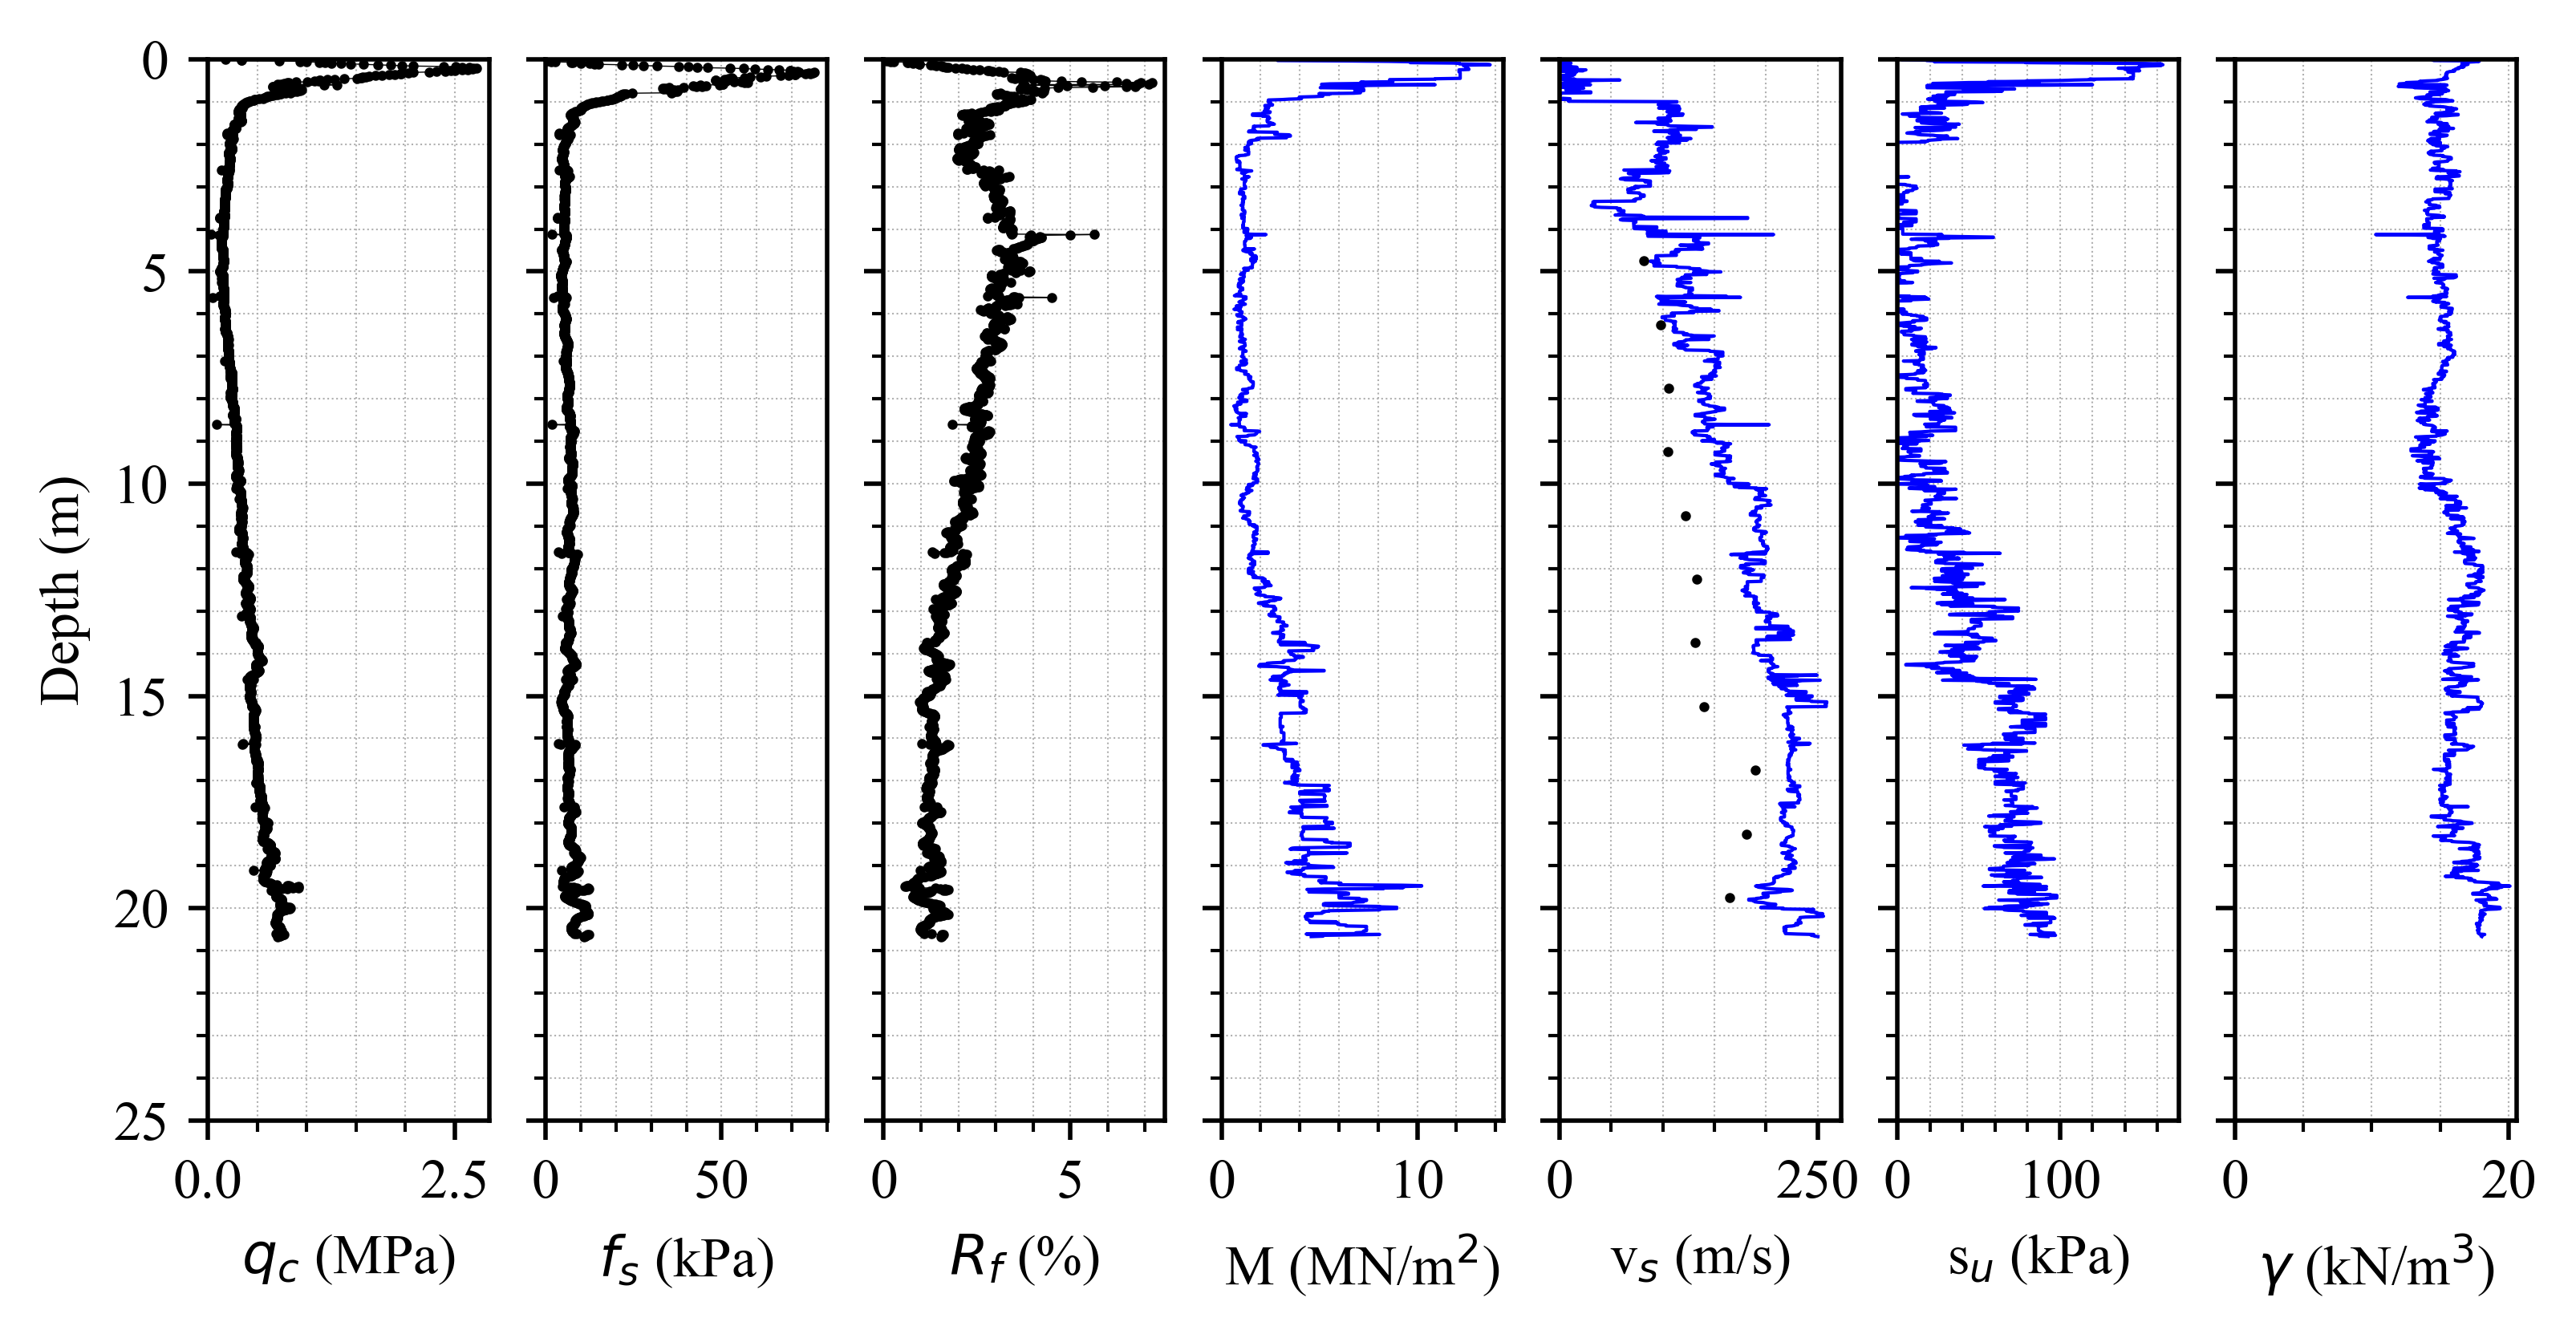

In [16]:
cm = 1/2.54  # centimeters in inches
fig, axes = plot_test_sites((17*cm, 8*cm), 7, df_test_norway, plot_columns_x_label)

# labels = ['Mayne (2006)', 'Hegazy and Mayne (1995)', 'Hegazy and Mayne (2006)']

# line2 = axes[-1].plot(vs_2, z, marker='d', markevery = 1,  markeredgecolor='k', markeredgewidth=0.0, color='sienna', linewidth=0.5, markersize=0, linestyle='solid', zorder=-10) #Mayne (2006)
# axes[-1].annotate('', xy=(1.1, 0.59), xytext=(1.1, 0.69), arrowprops=dict(arrowstyle='-', linestyle='solid', linewidth=0.9, color='sienna'), xycoords='axes fraction')
# axes[-1].text(1.05, 0.85, labels[0], color='k', ha='left', va='center', rotation=90, transform=axes[-1].transAxes)

# line3 = axes[-1].plot(vs_10, z, marker='s', markevery=1, markeredgecolor='k', markeredgewidth=0.0, color='green', linewidth=0.5, markersize=0, linestyle='solid', zorder=-10) #Hegazy and Mayne 1995
# axes[-1].annotate('', xy=(1.1, -0.15), xytext=(1.1, -0.05), arrowprops=dict(arrowstyle='-', linestyle='solid', linewidth=0.9, color='green'), xycoords='axes fraction')
# axes[-1].text(1.05, 0.25, labels[1], color='k', ha='left', va='center', rotation=90, transform=axes[-1].transAxes)

# axes[-1].fill_betweenx(y=z, x1=vs_2, x2=vs_10, zorder=-50, facecolor='gray', alpha=0.20, hatch='//////', linewidth=0.3, edgecolor='gray')

# line3 = axes[-1].plot(vs_3, z, marker='s', markevery=1, markeredgecolor='k', markeredgewidth=0.0, color='purple', linewidth=0.5, markersize=0, linestyle='solid', zorder=-100) #Hegazy and Mayne 1995
# axes[-1].annotate('', xy=(1.23, -0.15), xytext=(1.23, -0.05), arrowprops=dict(arrowstyle='-', linestyle='solid', linewidth=0.9, color='purple'), xycoords='axes fraction')
# axes[-1].text(1.18, 0.25, labels[2], color='k', ha='left', va='center', rotation=90, transform=axes[-1].transAxes)

# axes[-1].set_xlim(xmin=15, xmax=23)

plot_columns = ['$\gamma$ (kN/m$^3$)',  'M (MN/m$^2$)', 's$_u$ (kPa)', 'v$_s$ (m/s)']
plot_columns = ['M (MN/m$^2$)', 'v$_s$ (m/s)', 's$_u$ (kPa)', '$\gamma$ (kN/m$^3$)']

j = 0
for i in pred_df.columns:
    axes[3+j].plot(pred_df[i].values,
                df_test_norway['Depth (m)'].values,
                label='ML output',
                color='blue', linewidth = 0.6, markersize=0.0)
    
    axes[3+j].set_xlabel(plot_columns[j])
    axes[3+j].grid(True, which='both', linestyle = 'dotted', linewidth = 0.3)
    # axes[3+j].legend(loc='lower center', handlelength=1.5, labelspacing=0.3, frameon=True, bbox_to_anchor=(0.5, -0.02))

    axes[3+j].minorticks_on()
    axes[3+j].invert_yaxis()
    axes[3+j].set_xlim(xmin=0)
    j += 1


#shear wave velocity 
axes[-3].plot(df_vs.iloc[:,-1].values, df_vs.iloc[:,0].values, label='Raw data', marker='o', color='k', linewidth = 0.2, markersize=0.8)

#unit weight
# axes[-1].plot(unit_weight_data.iloc[:,-1].values, unit_weight_data.iloc[:,0].values, label='Raw data', marker='o', color='k', linewidth = 0.2, markersize=0.8)
# axes[-1].set_xlim(xmin=14, xmax = 22)  
# axes[-1].plot(sdmt_data.iloc[:,7], sdmt_data.iloc[:,0], label  = 'SDMT', marker='o', color='r', linewidth = 0.2, markersize=0.8)

#constrained modulus
# axes[-4].plot(sdmt_data.iloc[:,16], sdmt_data.iloc[:,0], label  = 'SDMT', marker='o', color='r', linewidth = 0.2, markersize=0.8)

#undrained shear strength
# axes[-2].plot((98.7,98.7), (0,25), label='Raw data', color='k', linewidth = 0.2, markersize=0.8)
# axes[-2].set_xlim(xmin=0, xmax = 150)  
# axes[-2].plot(sdmt_data.iloc[:,17], sdmt_data.iloc[:,0], label  = 'SDMT', marker='o', color='r', linewidth = 0.2, markersize=0.8)


axes[0].invert_yaxis()
fig.subplots_adjust(right=0.94, top = 0.98, bottom = 0.14, left = 0.08)
plt.savefig(save_path, dpi = 700)